<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/MLA5_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 5
# Adam Winders 
# CS430-ON 
# Machine Learning in the Cloud
<br>


## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
Imports for Voting, Bagging, Randomg Forest, and AdaBoost classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Imports for classification_report and ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Other classifiers

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as fig
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Line Plots

Plots straight line on a plot

In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

Draws the plot margins similar to the book

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

In [ ]:
import math
entropy = -1*((0.4*math.log2(0.4))+(0.6*math.log2(0.6)))
print("Entropy of the whole system is: ", entropy)

Entropy of the whole system is:  0.9709505944546686


# Problem 1

### Acquire Data

Loads **landsat_train.csv** into a dataframe named **landsat_train**

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/landsat_train.csv')

Loads **landsat_test.csv** into a dataframe named **landsat_test**

In [ ]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/landsat_test.csv')

### Statistics and Visual Exploration

Creates barplot to display the number of landplots for **landsat_train** 

In [ ]:
land_type_train = landsat_train['land_type'].groupby(landsat_train['land_type']).count()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '7')])

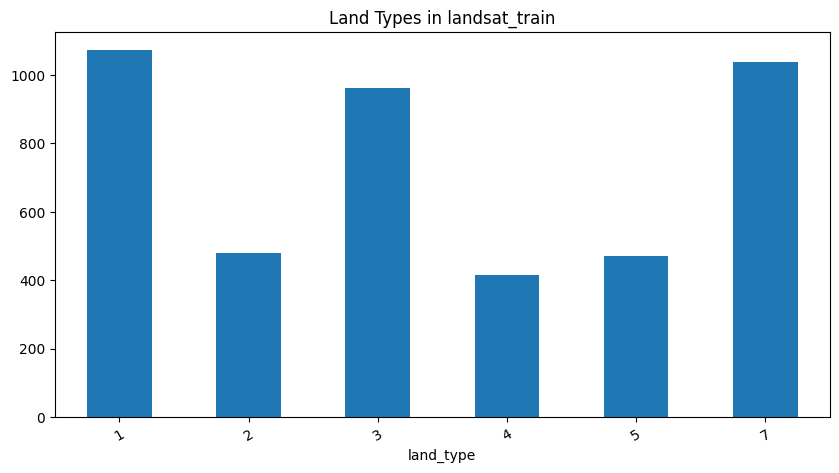

In [ ]:
land_type_train.plot(kind='bar', figsize=(10,5), title='Land Types in landsat_train')
plt.xticks(rotation=30, horizontalalignment="center")

Creates barplot to display the number of landplots for **landsat_test** 

In [ ]:
land_type_test = landsat_test['land_type'].groupby(landsat_test['land_type']).count()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '7')])

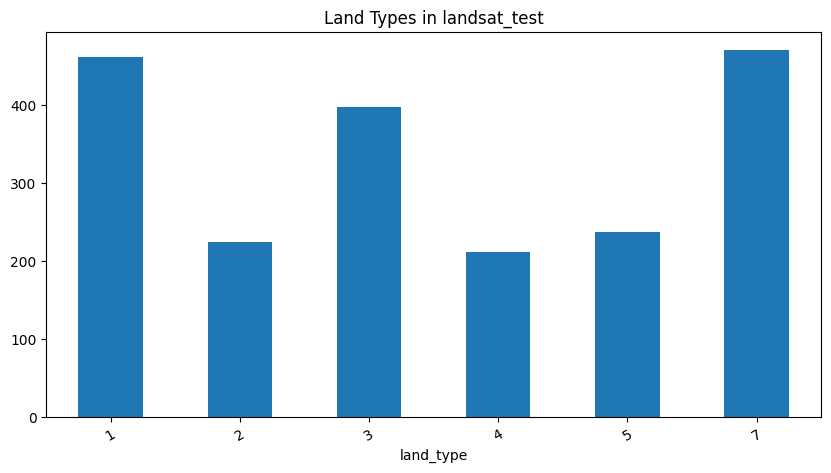

In [ ]:
land_type_test.plot(kind='bar', figsize=(10,5), title='Land Types in landsat_test')
plt.xticks(rotation=30, horizontalalignment="center")

### Splitting Data into Train/Test

Creates a dataframe called **X_train** with all columns from **landsat_train** except for *land_type*

In [144]:
X_train = landsat_train[['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']]

Creates a dataframe called **X_test** with all columns from **landsat_test** except for *land_type*

In [146]:
X_test = landsat_test[['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']]

Creates a dataframe called **y_train** with the *land_type* column from **landsat_train**

In [149]:
y_train = landsat_train['land_type']

Creates a dataframe called **y_test** with the *land_type* column from **landsat_test**

In [155]:
y_test = landsat_test['land_type']

### Building the Pipeline

Creates a column transformer that will MinMax scale the numerical variables

In [153]:
num_attribs = ['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']

In [154]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),]
                  )

Creates a pipeline that transforms the data and then runs the RandomForestClassifier algorithm

In [159]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=4435, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

Runs the pipeline to fit the RandomForestClassifier model

In [160]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g',
                                                   'bottom_middle_infra1',
                                                   'bottom_middle_infra2',
                                                   'bottom_right_r',
                                                   'bottom_right_g',
                                                   'bottom_right_infra1',
                                                   'bottom_right_infra2'])])),
                ('rf',
                 RandomForestClassifier(max_samples=4435, n_estimators=1000,
                                        n_jobs=-1))])

### Evaluating the Model

Runs the pipeline to predict y values from the **test** data set and saves them into a variable called **y_pred**

In [161]:
y_pred = random_forest.predict(X_test)

Uses the **classification_function** to display the *precision*, *recall*, and *F1 score* for each class

In [162]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       468
           2       0.96      0.96      0.96       225
           3       0.95      0.87      0.91       435
           4       0.60      0.76      0.67       167
           5       0.89      0.92      0.90       228
           7       0.87      0.85      0.86       477

    accuracy                           0.90      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.91      0.90      0.90      2000



Uses the ConfusionMatrixDisplay function to display a heatmap of the confusion matrix

In [164]:
classes = random_forest.named_steps.rf.classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

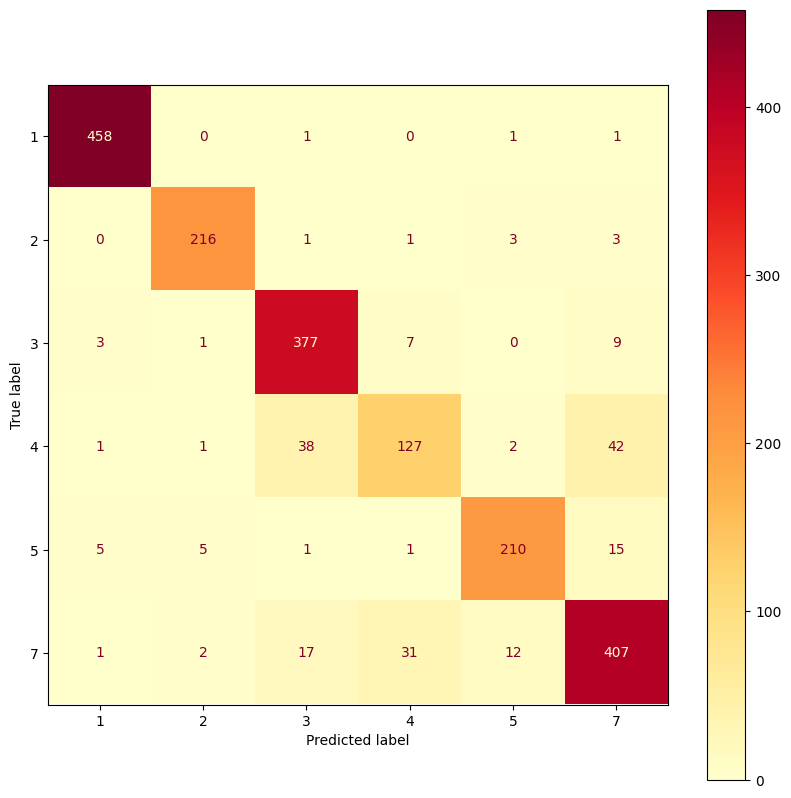

In [165]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

Displays percentage of data from heatmap into each quadrant

<Axes: >

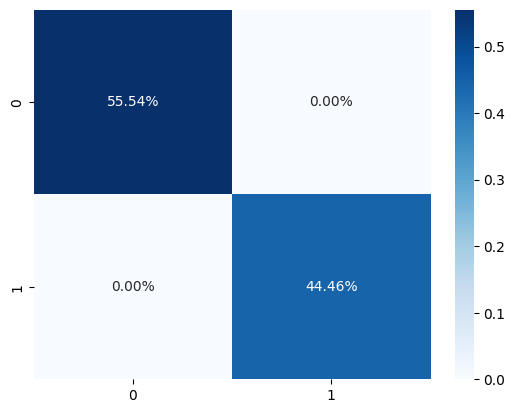

In [215]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Labels each quadrant percentage

<Axes: >

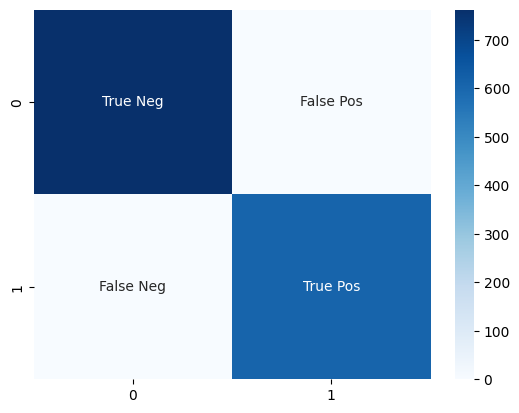

In [208]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')

### Conclusion


According to the models used above, this data is **highly reliable** for predicting the land type. True Neg (55.54%) and True Pos (44.46%) were predicted correctly 100% of the time.

# Problem 2 - Voting Classifier

### Acquire Data

Loads **landsat_train.csv** into a dataframe named **landsat_train** and **landsat_test.csv** into a dataframe named **landsat_test**

In [169]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/landsat_train.csv')

In [168]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/landsat_test.csv')

### Splitting Data into Train/Test

Creates a dataframe called **X_train** with all columns from **landsat_train** except for *land_type*

In [171]:
X_train = landsat_train[['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']]

Creates a dataframe called **X_test** with all columns from **landsat_test** except for *land_type*

In [172]:
X_test = landsat_test[['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']]

Creates a dataframe called **y_train** with the *land_type* column from **landsat_train**

In [173]:
y_train = landsat_train['land_type']

Creates a dataframe called **y_test** with the *land_type* column from **landsat_test**

In [174]:
y_test = landsat_test['land_type']

### Building the Pipeline

Creates a column transformer that will MinMax scale the numerical variables

In [175]:
num_attribs = ['top_left_r', 'top_left_g','top_left_infra1','top_left_infra2','top_middle_r','top_middle_g','top_middle_infra1','top_middle_infra2','top_right_r','top_right_g','bottom_left_infra2','bottom_middle_r','bottom_middle_g','bottom_middle_infra1','bottom_middle_infra2','bottom_right_r','bottom_right_g','bottom_right_infra1','bottom_right_infra2']

In [176]:
col_transform = ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(), num_attribs)],
                                  remainder='passthrough')

### Voting Classifier

In [177]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [178]:
voting = Pipeline([
                     ('transform', col_transform),
                     ('voting_ensemble',VotingClassifier(
                         estimators=[
                                     ('knn',knn),
                                     ('lr',lr),
                                     ('svc',svc)
                                     ], voting='hard'))
                     ])

Executing the Model

In [179]:
voting.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g',
                                                   'bottom_middle_infra1',
                                                   'bottom_middle_infra2',
                                                   'bottom_right_r',
                                                   'bottom_right_g',
                                                   'bottom_right_infra1',
                                                   'bottom_right_infra2'])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

# Problem 3

### Acquire Data

Loads the **banknote_authentication.csv** into a dataframe named **df**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/banknote_authentication.csv')

### Splitting Data into Train/Test

Creates a dataframe called **X** that includes all columns except *date* and *forgery*
<br>
Creates a dataframe called **y** that only includes *forgery*

In [180]:
X = df[['variance','skewness','curtosis','entropy']]
y = df['forgery']

### Building the Pipeline

Creates a column transformer that will MinMax scale the numerical variables

In [181]:
num_attribs = ['variance','skewness','curtosis','entropy']

In [183]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),]
                  )

Creates a pipeline that transforms the data and then runs the RandomForestClassifier algorithm

In [187]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=1372, bootstrap=True, n_jobs=-1))
                     ])

### Executing the Model

Runs the pipeline to fit the RandomForestClassifier model

In [188]:
random_forest.fit(X,np.ravel(y))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1372, n_estimators=1000,
                                        n_jobs=-1))])

### Evaluating the Model

Runs the pipeline to predict y values from the **test** data set and saves them into a variable called **y_pred**

In [189]:
y_pred = random_forest.predict(X)

Uses the **classification_function** to display the *precision*, *recall*, and *F1 score* for each class

In [190]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1372
   macro avg       1.00      1.00      1.00      1372
weighted avg       1.00      1.00      1.00      1372



Uses the ConfusionMatrixDisplay function to display a heatmap of the confusion matrix

In [192]:
classes = random_forest.named_steps.rf.classes_
cm = confusion_matrix(y, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

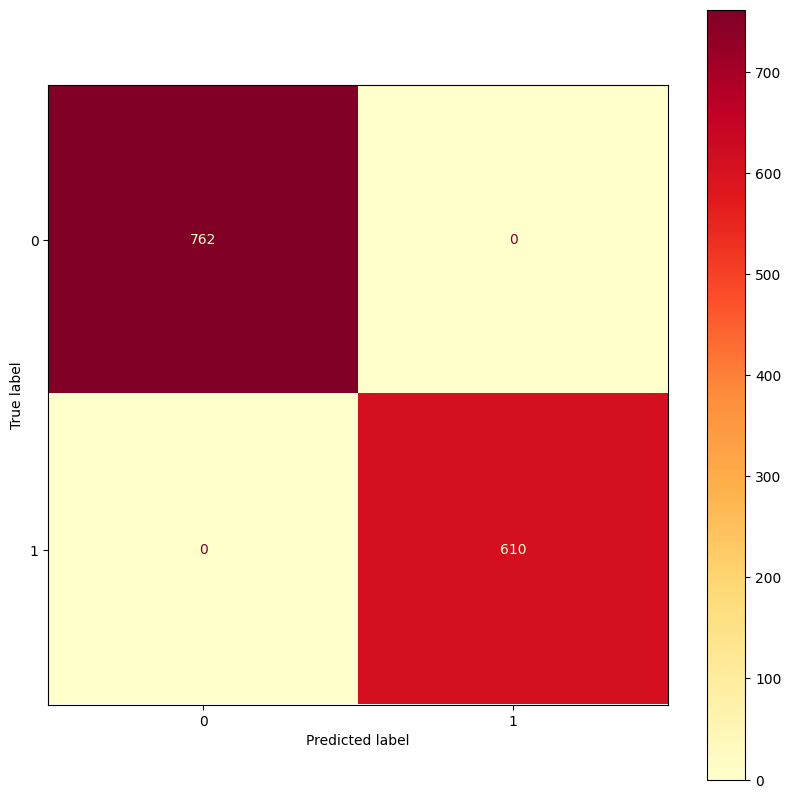

In [193]:
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')